# <div align="center"><b> Cobaya for Bayesian Analysis </b></div>


## <div align="center"><b> Quickstart example given in the documentation </b></div>


In [1]:
info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.2, 0],
            "covs": [[0.1, 0.05],
                     [0.05, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}


import sys
for k, v in {"-f": "force", "-r": "resume", "-d": "debug"}.items():
    if k in sys.argv:
        info[v] = True

In [2]:
from cobaya.run import run

updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 7110.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:2.04927, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2023-04-04 17:00:25 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.173
[mcmc]  - Convergence of means: R-1 = 0.457861 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.26

[root] *WARNING* outlier fraction 0.024342105263157894 
Mean:
[ 0.22243064 -0.00157827]
Covariance matrix:
[[0.08852075 0.03692235]
 [0.03692235 0.15950992]]


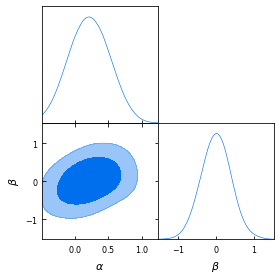

In [3]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline  
# uncomment if running from the Jupyter notebook
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

## <div align="center"><b> Advanced example given in the documentation </b></div>


### <div align="center"><b> Gaussian quarter ring </b></div>


In [4]:


# Configuration
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
try:
    from cobaya.run import run
except ImportError:
    sys.path.insert(0,'../../cobaya')
    from cobaya.run import run



###  Defining the Gaussian ring likelihood and priors for its parameters 

In [5]:
import numpy as np
from scipy import stats

def gauss_ring_logp(x, y):
    return stats.norm.logpdf(np.sqrt(x**2+y**2), loc=1, scale=0.02)

info = {"likelihood": {"ring": gauss_ring_logp}}


In [6]:

info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

### Defining dynamical derived parameters: radius and angle 

In [7]:
get_r = lambda x,y: np.sqrt(x**2+y**2)
get_theta = lambda x,y: np.arctan(y/x)

info["params"]["r"] = {"derived": get_r}
info["params"]["theta"] = {"derived": get_theta,
                           "latex": r"\theta", "min": 0, "max": np.pi/2}

# N.B.: the options "min" and "max" for theta are not a prior (it is not a sampled parameter!)
# but the ranges used by GetDist to plot and derive marginal distributions for theta.



### Sample and Plot

In [8]:
# Very non-gaussian shape: increase the default convergence criterion and
# increase limit on tries before chain gets stuck
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

from cobaya.run import run
updated_info, sampler = run(info)

[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 2050.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2023-04-04 17:02:05 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.711
[mcmc]  - Convergence of means: R-1 = 0.425191 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.527
[mcmc]  - Convergence of means: R-1 = 6.200800 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.466

[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.103
[mcmc]  - Convergence of means: R-1 = 0.012826 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.102
[mcmc]  - Convergence of means: R-1 = 0.016535 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.101
[mcmc]  - Convergence of means: R-1 = 0.013236 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.101
[mcmc]  - Convergence of means: R-1 = 0.012919 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3280 samples accepted.
[mcmc]  - Acceptance rate: 0.101
[mcmc]  - Convergence of means: R-1 = 0.010958

[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.095
[mcmc]  - Convergence of means: R-1 = 0.001112 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.095
[mcmc]  - Convergence of means: R-1 = 0.000948 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.095
[mcmc]  - Convergence of means: R-1 = 0.001159 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.094
[mcmc]  - Convergence of means: R-1 = 0.002278 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6320 samples accepted.
[mcmc]  - Acceptance rate: 0.094
[mcmc]  - Convergence of means: R-1 = 0.004238

[root] *WARNING* outlier fraction 0.000125 
[root] *WARNING* auto bandwidth for theta very small or failed (h=0.0006259155559734102,N_eff=2515.4464586495574). Using fallback (h=0.08195980659335125)


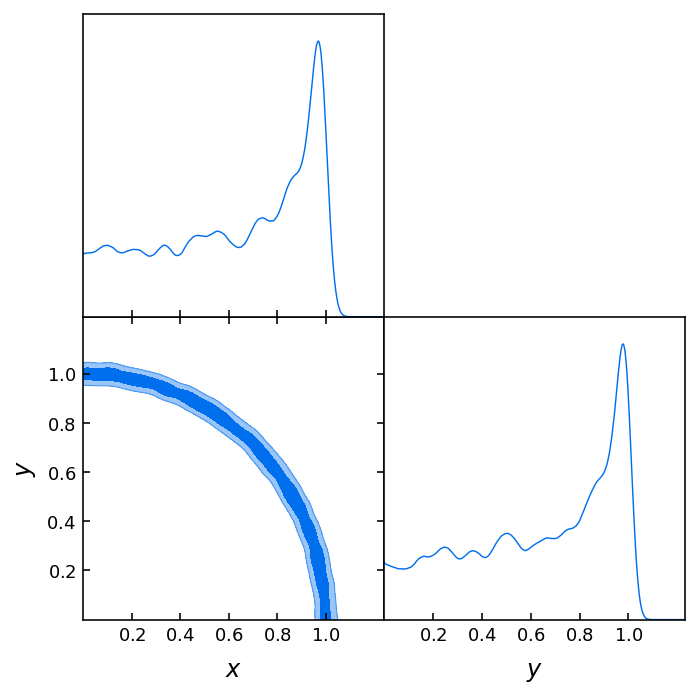

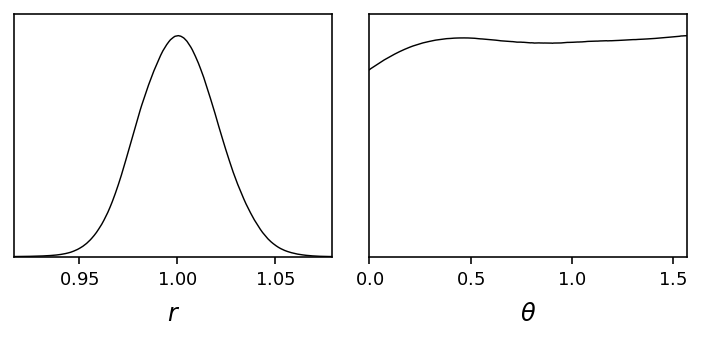

In [9]:
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

products = sampler.products()
gdsamples = MCSamplesFromCobaya(updated_info, products["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)
gdplot.export("example_adv_ring.png")
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.plots_1d(gdsamples, ["r", "theta"], nx=2)
gdplot.export("example_adv_r_theta.png")


###  Imposing a Gaussian band along x=y

In [10]:
info["prior"] = {"x_eq_y_band": lambda x, y: stats.norm.logpdf(x - y, loc=0, scale=0.3)}   
# Loc represents position of mean and scale represents the standard deviation

from cobaya.run import run
updated_info_x_eq_y, sampler_x_eq_y = run(info)



[prior] *WARNING* External prior 'x_eq_y_band' loaded. Mind that it might not be normalized!
[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 4250.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2023-04-04 17:02:41 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.719
[mcmc]  - Convergence of means: R-1 = 8.949485 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.443
[mcmc]  - Convergence of means: R-1 = 0.971423 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal 

[mcmc]  - Convergence of means: R-1 = 0.016118 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.209
[mcmc]  - Convergence of means: R-1 = 0.013775 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.209
[mcmc]  - Convergence of means: R-1 = 0.011167 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.208
[mcmc]  - Convergence of means: R-1 = 0.007708 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.207
[mcmc]  - Convergence of means: R-1 = 0.009656 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.013703 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.199
[mcmc]  - Convergence of means: R-1 = 0.012095 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.200
[mcmc]  - Convergence of means: R-1 = 0.009882 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.199
[mcmc]  - Convergence of means: R-1 = 0.006562 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.199
[mcmc]  - Convergence of means: R-1 = 0.008693 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.007109 after 7168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.194
[mcmc]  - Convergence of means: R-1 = 0.007534 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.194
[mcmc]  - Convergence of means: R-1 = 0.007368 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.194
[mcmc]  - Convergence of means: R-1 = 0.006877 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate: 0.193
[mcmc]  - Convergence of means: R-1 = 0.005855 after 7424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Acceptance rate: 0.191
[mcmc]  - Convergence of means: R-1 = 0.007237 after 9600 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12080 samples accepted.
[mcmc]  - Acceptance rate: 0.191
[mcmc]  - Convergence of means: R-1 = 0.006296 after 9664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12160 samples accepted.
[mcmc]  - Acceptance rate: 0.191
[mcmc]  - Convergence of means: R-1 = 0.006651 after 9728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12240 samples accepted.
[mcmc]  - Acceptance rate: 0.190
[mcmc]  - Convergence of means: R-1 = 0.005941 after 9792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12320 samples accepted.
[mcmc]  - Acceptance rate: 0.190
[mcmc]  - Convergence of means: R-1 = 0.006028 after 9856 accepted steps
[mcmc]  - Updated covarian

[mcmc] Learn + convergence test @ 15040 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.002766 after 12032 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15120 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.002699 after 12096 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15200 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.004164 after 12160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15280 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.004145 after 12224 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15360 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 =

[mcmc]  - Convergence of bounds: R-1 = 0.047695 after 18000 accepted steps
[mcmc] The run has converged!
[mcmc] Sampling complete after 18000 accepted steps.


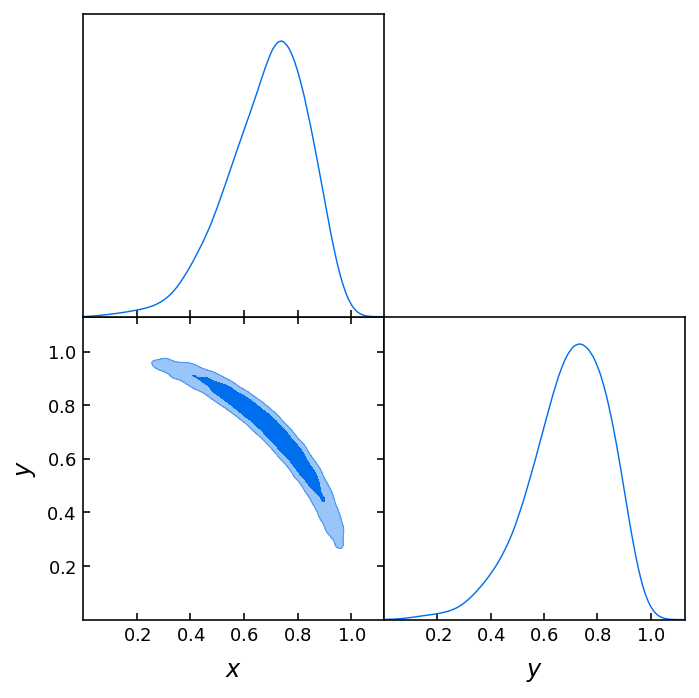

In [11]:
products_x_eq_y = sampler_x_eq_y.products()
gdsamples_x_eq_y = MCSamplesFromCobaya(
    updated_info_x_eq_y, products_x_eq_y["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_x_eq_y, ["x", "y"], filled=True)
gdplot.export("example_adv_band.png")



### Alternative: r and θ as derived parameters of the likelihood

In [12]:
# List available derived parameters in the 'output_params' option of the likelihood.
# To make room for that, you need assign the function to the option 'external'.
# Return both the log-likelihood and a dictionary of derived parameters.
def gauss_ring_logp_with_derived(x, y):
    r = np.sqrt(x**2+y**2)
    derived = {"r": r, "theta": np.arctan(y/x)}
    return stats.norm.logpdf(r, loc=1, scale=0.02), derived

info_alt = {"likelihood": {"ring":
    {"external": gauss_ring_logp_with_derived, "output_params": ["r", "theta"]}}}

# Now we don't need to *define* (but do need to *mention*) r or theta
# if we want their values included in the chain
info_alt["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "r": None,
    "theta": {"latex": r"\theta", "min": 0, "max": np.pi/2}}
# Copy the prior and sampler info from the old one
info_alt["prior"] = info["prior"]
info_alt["sampler"] = info["sampler"]

# And run
updated_info_alt, sampler_alt = run(info_alt)


[prior] *WARNING* External prior 'x_eq_y_band' loaded. Mind that it might not be normalized!
[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 2240.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2023-04-04 17:03:53 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.634
[mcmc]  - Convergence of means: R-1 = 2.494834 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.418
[mcmc]  - Convergence of means: R-1 = 1.088779 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal 

[mcmc]  - Convergence of means: R-1 = 0.010542 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.220
[mcmc]  - Convergence of means: R-1 = 0.009068 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.220
[mcmc]  - Convergence of means: R-1 = 0.011354 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.218
[mcmc]  - Convergence of means: R-1 = 0.019255 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.218
[mcmc]  - Convergence of means: R-1 = 0.019134 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.003120 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.200
[mcmc]  - Convergence of means: R-1 = 0.003600 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.199
[mcmc]  - Convergence of means: R-1 = 0.003257 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.198
[mcmc]  - Convergence of means: R-1 = 0.000907 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.198
[mcmc]  - Convergence of means: R-1 = 0.001234 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Convergence of means: R-1 = 0.001306 after 7168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.001635 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.000906 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.001606 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate: 0.188
[mcmc]  - Convergence of means: R-1 = 0.002168 after 7424 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[mcmc]  - Acceptance rate: 0.185
[mcmc]  - Convergence of means: R-1 = 0.001105 after 9600 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12080 samples accepted.
[mcmc]  - Acceptance rate: 0.185
[mcmc]  - Convergence of means: R-1 = 0.001212 after 9664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12160 samples accepted.
[mcmc]  - Acceptance rate: 0.185
[mcmc]  - Convergence of means: R-1 = 0.001161 after 9728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12240 samples accepted.
[mcmc]  - Acceptance rate: 0.185
[mcmc]  - Convergence of means: R-1 = 0.001258 after 9792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12320 samples accepted.
[mcmc]  - Acceptance rate: 0.185
[mcmc]  - Convergence of means: R-1 = 0.001273 after 9856 accepted steps
[mcmc]  - Updated covarian

[mcmc] Learn + convergence test @ 15040 samples accepted.
[mcmc]  - Acceptance rate: 0.184
[mcmc]  - Convergence of means: R-1 = 0.000658 after 12032 accepted steps
[mcmc]  - Convergence of bounds: R-1 = 0.032506 after 15040 accepted steps
[mcmc] The run has converged!
[mcmc] Sampling complete after 15040 accepted steps.


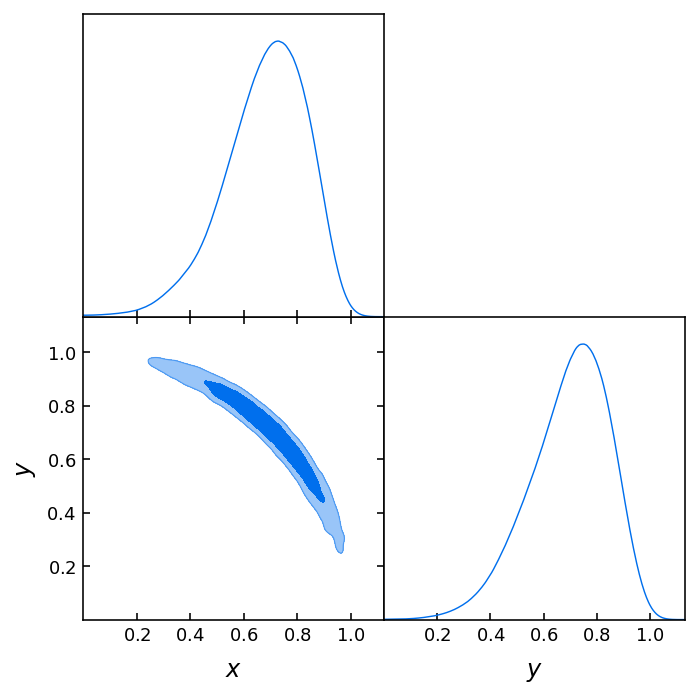

<Figure size 360x270 with 0 Axes>

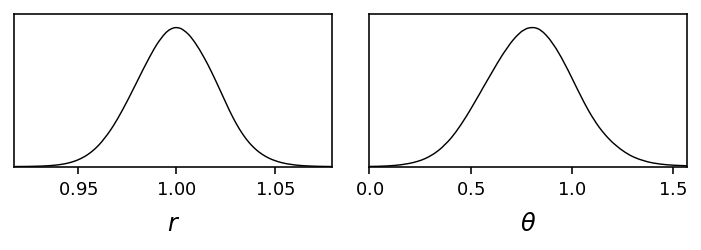

In [13]:
products_alt = sampler_alt.products()
gdsamples_alt = MCSamplesFromCobaya(
    updated_info_alt, products_alt["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_alt, ["x", "y"], filled=True)
gdplot = gdplt.get_single_plotter(width_inch=5)
gdplot.plots_1d(gdsamples_alt, ["r", "theta"], nx=2);



### Even better: sampling directly on r and θ

In [14]:
# r and theta are better variables with which to sample this posterior:
# the gaussian ring is an approximate gaussian on r (and uniform on theta),
# and the x = y band is an approximate gaussian on theta.
# Given how much simpler the posterior is in these variables,
# we should expect a more accurate result with the same number of samples,
# since now we don't have the complication of having to go around the ring.

from copy import deepcopy
info_rtheta = deepcopy(info)
info_rtheta["params"] = {
    "r": {"prior": {"min": 0, "max": 2}, "ref": 1,
          "proposal": 0.01, "drop": True},
    "theta": {"prior": {"min": 0, "max": np.pi/2}, "ref": 0,
               "proposal": 0.5, "latex": r"\theta", "drop": True},
    "x": lambda r,theta: r*np.cos(theta),
    "y": lambda r,theta: r*np.sin(theta)}
# Since our likelihood understands (x, y), not (r, theta), we *define* (x, y) in terms
# of (r, theta), to which we give priors, and *drop* them, i.e. indicate that they should
# not be passed to any likelihood.

# The priors above are just linear with specific ranges. There is also a Jacobian
# from the change of variables, which we can include as an additional prior.
# Here the Jacobian is just proportional to r, so the log-prior is proportional to log(r)
info_rtheta["prior"] = {"Jacobian" : lambda r: np.log(r)}

# We need to reformulate the prior in terms of the new sampled parameters: r, theta
info_rtheta["prior"]["x_eq_y_band"] = lambda r, theta: stats.norm.logpdf(
    r * (np.cos(theta) - np.sin(theta)), loc=0, scale=0.3)
updated_info_rtheta, sampler_rtheta = run(info_rtheta)


[prior] *WARNING* External prior 'Jacobian' loaded. Mind that it might not be normalized!
[prior] *WARNING* External prior 'x_eq_y_band' loaded. Mind that it might not be normalized!
[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 2970.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: r:1, theta:0
[mcmc] Sampling!
[mcmc] Progress @ 2023-04-04 17:04:59 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.179
[mcmc]  - Convergence of means: R-1 = 0.871288 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.298
[mcmc]  - Convergence of means

[mcmc] Learn + convergence test @ 2880 samples accepted.
[mcmc]  - Acceptance rate: 0.288
[mcmc]  - Convergence of means: R-1 = 0.005502 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.289
[mcmc]  - Convergence of means: R-1 = 0.004880 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.288
[mcmc]  - Convergence of means: R-1 = 0.003306 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.286
[mcmc]  - Convergence of means: R-1 = 0.005234 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.287
[mcmc]  - Convergence of means: R-1 = 0.008355

[mcmc] Learn + convergence test @ 5920 samples accepted.
[mcmc]  - Acceptance rate: 0.291
[mcmc]  - Convergence of means: R-1 = 0.003713 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.291
[mcmc]  - Convergence of means: R-1 = 0.003711 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.291
[mcmc]  - Convergence of means: R-1 = 0.003005 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.291
[mcmc]  - Convergence of means: R-1 = 0.003110 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.291
[mcmc]  - Convergence of means: R-1 = 0.003554

[mcmc] Learn + convergence test @ 8960 samples accepted.
[mcmc]  - Acceptance rate: 0.296
[mcmc]  - Convergence of means: R-1 = 0.000896 after 7168 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9040 samples accepted.
[mcmc]  - Acceptance rate: 0.296
[mcmc]  - Convergence of means: R-1 = 0.001002 after 7232 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9120 samples accepted.
[mcmc]  - Acceptance rate: 0.296
[mcmc]  - Convergence of means: R-1 = 0.001034 after 7296 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9200 samples accepted.
[mcmc]  - Acceptance rate: 0.296
[mcmc]  - Convergence of means: R-1 = 0.001001 after 7360 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 9280 samples accepted.
[mcmc]  - Acceptance rate: 0.296
[mcmc]  - Convergence of means: R-1 = 0.001723

[mcmc] Learn + convergence test @ 12000 samples accepted.
[mcmc]  - Acceptance rate: 0.298
[mcmc]  - Convergence of means: R-1 = 0.002131 after 9600 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12080 samples accepted.
[mcmc]  - Acceptance rate: 0.298
[mcmc]  - Convergence of means: R-1 = 0.002341 after 9664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12160 samples accepted.
[mcmc]  - Acceptance rate: 0.298
[mcmc]  - Convergence of means: R-1 = 0.001967 after 9728 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12240 samples accepted.
[mcmc]  - Acceptance rate: 0.297
[mcmc]  - Convergence of means: R-1 = 0.001148 after 9792 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 12320 samples accepted.
[mcmc]  - Acceptance rate: 0.297
[mcmc]  - Convergence of means: R-1 = 0.0

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15040 samples accepted.
[mcmc]  - Acceptance rate: 0.295
[mcmc]  - Convergence of means: R-1 = 0.001122 after 12032 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15120 samples accepted.
[mcmc]  - Acceptance rate: 0.295
[mcmc]  - Convergence of means: R-1 = 0.001078 after 12096 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15200 samples accepted.
[mcmc]  - Acceptance rate: 0.295
[mcmc]  - Convergence of means: R-1 = 0.001104 after 12160 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15280 samples accepted.
[mcmc]  - Acceptance rate: 0.295
[mcmc]  - Convergence of means: R-1 = 0.001401 after 12224 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 15360 samples accepted.
[mcmc]  - Accepta

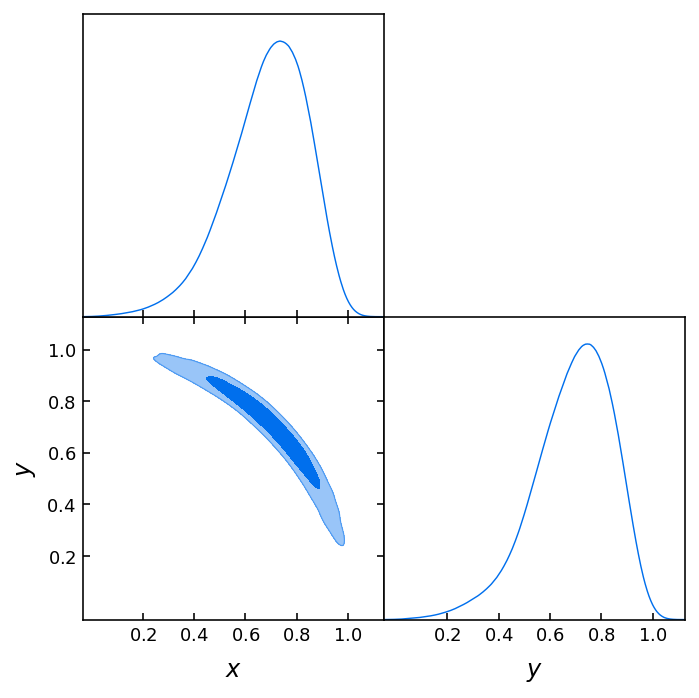

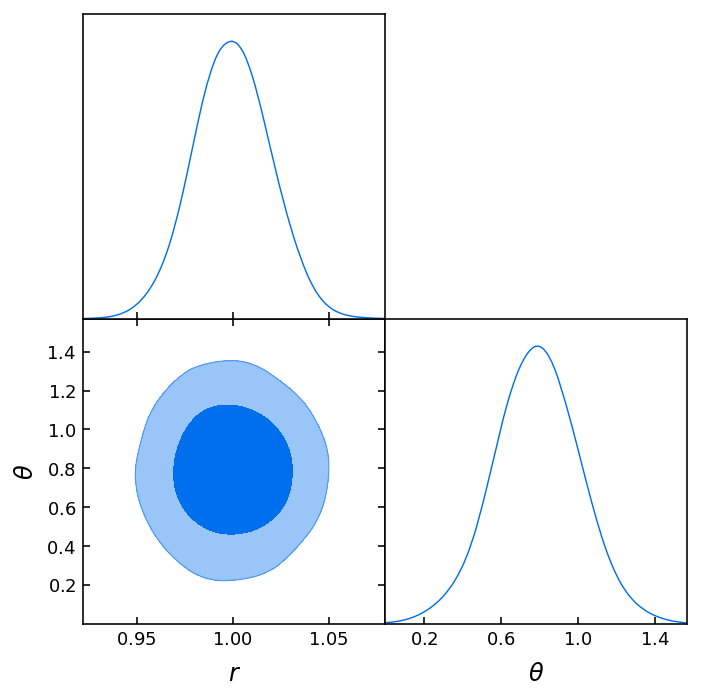

In [15]:
products_rtheta = sampler_rtheta.products()
gdsamples_rtheta = MCSamplesFromCobaya(
    updated_info_rtheta, products_rtheta["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_rtheta, ["x", "y"], filled=True)
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples_rtheta, ["r", "theta"], filled=True)